In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [5]:
# Get only the cubes that have our line of interest in them
mol_tag = 46527
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

   FREQ    ERR   LGINT   DR  ELO   GUP MOLWT TAG QNFMT  Ju  Ku  vu F1u F2u F3u  Jl  Kl  vl F1l F2l F3l name Lab 
   MHz     MHz  MHz nm2     1 / cm       u                                                                      
---------- ---- ------- --- ------ --- ----- --- ----- --- --- --- --- --- --- --- --- --- --- --- --- ---- ----
150295.607 0.01 -2.0864   2 5.0134  21    46 527   101   3  --  --  --  --  --   2  --  --  --  --  --  NS+ True
    FREQ     ERR    LGINT   DR  ELO   GUP MOLWT TAG QNFMT  Ju  Ku  vu F1u F2u F3u  Jl  Kl  vl F1l F2l F3l name  Lab 
    MHz      MHz   MHz nm2     1 / cm       u                                                                       
----------- ------ ------- --- ------ --- ----- --- ----- --- --- --- --- --- --- --- --- --- --- --- --- ---- -----
100198.4741 0.0017 -2.6059   2 1.6711  15    46 527   101   2  --  --  --  --  --   1  --  --  --  --  --  NS+ False
   FREQ    ERR   LGINT   DR  ELO   GUP MOLWT TAG QNFMT  Ju  Ku  vu F1u F2u F3u  

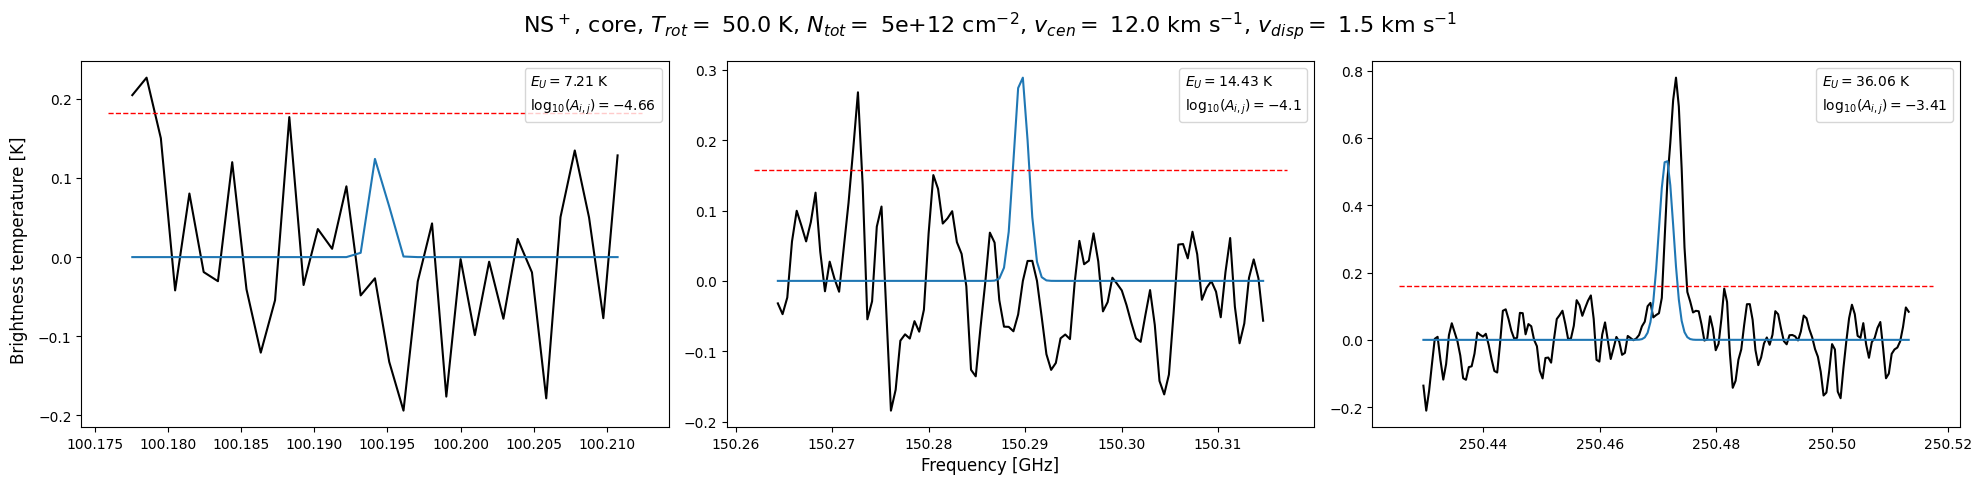

In [18]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 5.0e+12, v_cen = 12.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=5, 
               nrows=1, ncols=3, parse_loc=False, line_by_line=True, name_for_plot=f'NS$^+$', extr_type="coord", crd=crd,
              show_2_sigma=True)

In [11]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

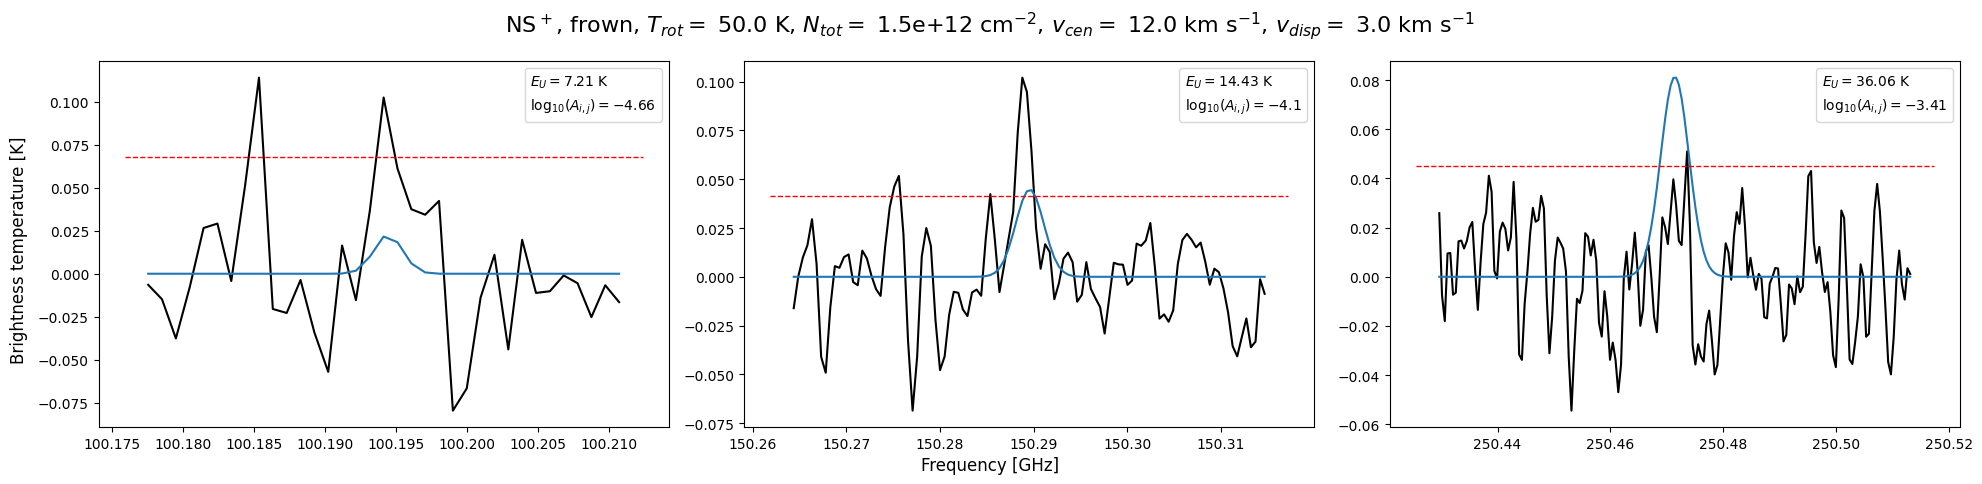

In [15]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 1.5e+12, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=5, 
                       nrows=1, ncols=3, parse_loc=False, line_by_line=True, name_for_plot=f'NS$^+$', extr_type="reg", just_data=False,
                       show_2_sigma=True, return_freqs=True)

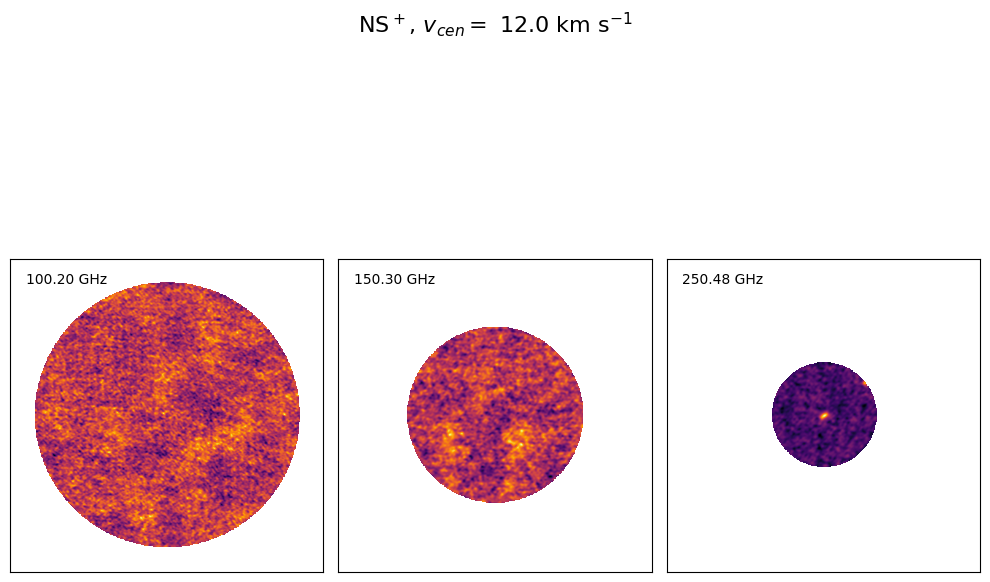

In [17]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=10, fig_height=3, nrows=1, ncols=3, name_for_plot=f'NS$^+$')